We've had quite a bit of trouble matching our data to our theoretical models. I'm writing this notebook for data transperency so that we can check our meathods. and eliminate a careless math error from the list of possible mistakes. 

Heres a running list of possiblilities for error and solutions that Merrit and I have discussed:

1. The tube we used to center the probe in the solenoid may be feromagnetic and not aluminum as we initially thought.
    1. (see if a neodymium magnet sticks to it)
        1. checked this and it appears to be aluminum (no force on the neodymium magnet when it was not moving)
2. The hall probe powersupply may produce magnetic fields.
    2. (Check the powersupply with the hall probe to make sure it has minimal effect on voltage output)
        2. effect seems to be minimal further than 3 inches from the box (the ocilating field of the transformer may be filtered by the gain circuitry?)
3. Our model for the field in a solenoid is too simple (account for fringing fields)
    3. compare models and influence of fringing fields 2/5 of the way into the solinoid
        3. we verified that this was a miniml effect by compareing the field-probe output at the mouth of the solinoid 1/8th of the total coil length to the field in the calibration conficuration ~ 2/5 of the solenoid's length
3. Hunt for feromagnetic material in the vacinity of the experement, possible canidatees include: The stand we used for measurement of the helmholtz coils, the track itself used to measure hall-probe offset, the powersupply case, the table, 


To begin we have the following setup:
We have a hall probe which outputs a voltage proportional to the magnetic field with an unknown gain. 
the first step is to calibrate the sensor against a known magnetic field and for this we used our 575 turn solinoid. We set the solenoid on its end on a wooden table and pushed the probe into an aluminum pipe *(1)* that was stablized in the center of the solinoid by two pink board insulation foam discs. 

The hall probe itself has a large "wall wart" style powersupply/transformer *(2)* 

We used a $\pm 0.01 A$ constant current powersupply to drive the solenoid and saw clean signal on a multimeter to $\pm 0.005 V$ in the output of the hall probe. 

Anyway time to dive in and analize our data! first let's check to make sure out data has resonable values and that we know to what each colomn corisponds. 

In [26]:
# all the libraries we will use
import numpy as np
import uncertainties as u
from uncertainties import unumpy
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
%ls

 Volume in drive C has no label.
 Volume Serial Number is A4AD-16E2

 Directory of C:\Users\William Morse\ilikepie\ILab2\magForce\DataValidation

05/13/2016  09:33 AM    <DIR>          .
05/13/2016  09:33 AM    <DIR>          ..
04/10/2016  02:45 PM    <DIR>          .ipynb_checkpoints
05/13/2016  09:28 AM           314,270 calibrationPlot.png
03/17/2016  06:38 PM               578 helmFieldY.txt
05/13/2016  09:33 AM           216,140 Helmholtz coil data troubleshooting.ipynb
05/13/2016  09:28 AM           405,781 helmholtzPlot.png
03/17/2016  06:40 PM               564 quadFieldY.txt
05/13/2016  09:33 AM           249,220 quadripolePlot.png
04/10/2016  01:33 PM               411 radial_field.txt
05/12/2016  08:31 PM            14,202 Unumpy testing.ipynb
               8 File(s)      1,201,166 bytes
               3 Dir(s)  32,947,884,032 bytes free


In [27]:
#load in our calibration data from the text file "radial_field.txt"
solenoidCalibrationData = np.genfromtxt('radial_field.txt', delimiter=', ', skip_header=True)
print(solenoidCalibrationData)

[[ 0.     0.015]
 [ 0.25   0.37 ]
 [ 0.53   0.768]
 [ 0.7    1.003]
 [ 1.08   1.535]
 [ 1.25   1.776]
 [ 1.55   2.186]
 [ 1.74   2.456]
 [ 2.06   2.899]
 [ 2.26   3.181]
 [ 2.52   3.546]
 [ 2.77   3.889]
 [ 3.05   4.295]
 [ 0.     0.013]
 [-3.05  -4.255]
 [-0.25  -0.339]
 [-2.75  -3.834]
 [-0.5   -0.69 ]
 [-2.5   -3.486]
 [-0.75  -1.042]
 [-2.25  -3.148]
 [-1.    -1.396]
 [-2.    -2.793]
 [-1.25  -1.745]
 [-1.75  -2.448]
 [-1.5   -2.098]
 [-3.05  -4.266]]


This data looks good. we took points in a non-ascending order to avoid overheating our solenoid at the max current (3A). The columns match with our expected ranges. Current in the first column (-3.05 to 3.05). In the second column and first row we have some field (0.015 V) with no current corispondeing to the earth's magnetic field. 

Next we splice out the data into two arrays so we can plot the calibration data. 

In [28]:
# take all the rows and the first column and add the error
solenoidCalibrationCurrent = unumpy.uarray(solenoidCalibrationData[:,0], 0.01)
print(solenoidCalibrationCurrent) 

[0.0+/-0.01 0.25+/-0.01 0.53+/-0.01 0.7+/-0.01 1.08+/-0.01 1.25+/-0.01
 1.55+/-0.01 1.74+/-0.01 2.06+/-0.01 2.26+/-0.01 2.52+/-0.01 2.77+/-0.01
 3.05+/-0.01 0.0+/-0.01 -3.05+/-0.01 -0.25+/-0.01 -2.75+/-0.01 -0.5+/-0.01
 -2.5+/-0.01 -0.75+/-0.01 -2.25+/-0.01 -1.0+/-0.01 -2.0+/-0.01 -1.25+/-0.01
 -1.75+/-0.01 -1.5+/-0.01 -3.05+/-0.01]


In [29]:
solenoidCalibrationVoltage = unumpy.uarray(solenoidCalibrationData[:,1], 0.005) # take all the rows and the second column
print(solenoidCalibrationVoltage)

[0.015+/-0.005 0.37+/-0.005 0.768+/-0.005 1.003+/-0.005 1.535+/-0.005
 1.776+/-0.005 2.186+/-0.005 2.456+/-0.005 2.899+/-0.005 3.181+/-0.005
 3.546+/-0.005 3.889+/-0.005 4.295+/-0.005 0.013+/-0.005 -4.255+/-0.005
 -0.339+/-0.005 -3.834+/-0.005 -0.69+/-0.005 -3.486+/-0.005 -1.042+/-0.005
 -3.148+/-0.005 -1.396+/-0.005 -2.793+/-0.005 -1.745+/-0.005 -2.448+/-0.005
 -2.098+/-0.005 -4.266+/-0.005]


Idealy we want to find the gain on the Magnetic field probe in Teslas per Volt. That way we can multiply the voltage output of the sensor by the gain and get a measured B field in Tesla.

To acheve this we modeled the field of the solenoid as a function of current using $B = \mu_0 N I$ (the field inside a long solenoid where the length is much greater than the radius of the coil) *(3)*. If we multiply the current coumn by $\mu_0 N$ we get the theoritical value for the field inside the calibration solinoid and we can then plot the field as a function of the voltage and get the gain in $T/V$ from the slope of a fit line. 



In [30]:
mu_0 = (4*np.pi*1e-7) # fundemental constant T*m
solenoidTurnsN = u.ufloat(575, 1) # only input to our simple solenoid model
print((mu_0 * solenoidTurnsN))
# calculate the thoretical field from the current data:
solenoidCalibrationTheoField = solenoidCalibrationCurrent * (mu_0 * (solenoidTurnsN/.511))
print(solenoidCalibrationTheoField)

0.0007226+/-0.0000013
[0.0+/-1.4140240906568543e-05
 0.00035350602266421356+/-1.4153599663356634e-05
 0.0007494327680481328+/-1.4200181818106611e-05
 0.000989816863459798+/-1.424463765381302e-05
 0.0015271460179094028+/-1.4387503265124667e-05
 0.0017675301133210678+/-1.4470510573755192e-05
 0.002191737340518124+/-1.4644985498542915e-05
 0.0024604019177429264+/-1.4773486736486227e-05
 0.00291288962675312+/-1.5020309753054703e-05
 0.00319569444488449+/-1.5193247505073928e-05
 0.0035633407084552727+/-1.5438608688619653e-05
 0.003916846731119486+/-1.5695492816606745e-05
 0.004312773476503405+/-1.600635958897758e-05 0.0+/-1.4140240906568543e-05
 -0.004312773476503405+/-1.600635958897758e-05
 -0.00035350602266421356+/-1.4153599663356634e-05
 -0.0038885662493063494+/-1.5674209632499113e-05
 -0.0007070120453284271+/-1.4193600495818284e-05
 -0.0035350602266421356+/-1.5418932076290506e-05
 -0.0010605180679926407+/-1.4260019204361763e-05
 -0.003181554203977922+/-1.5184269037808232e-05
 -0.0014140

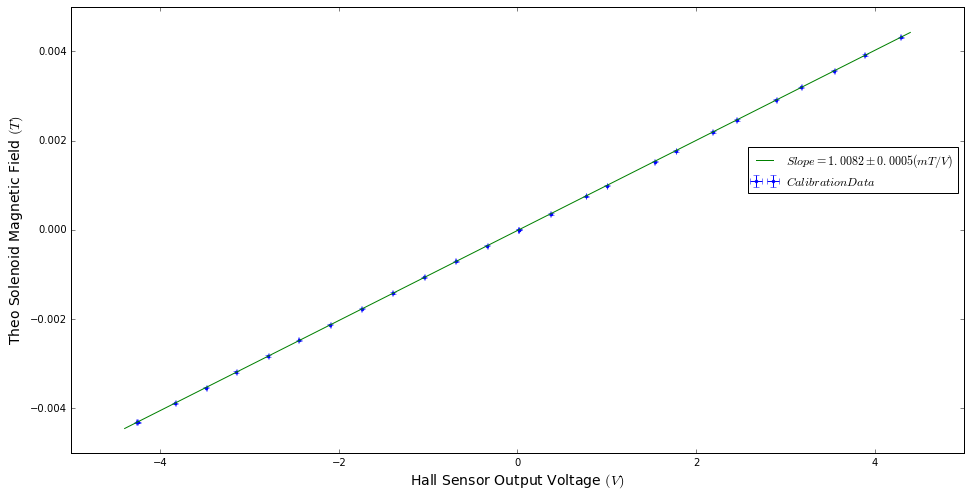

In [31]:
# now plot the data!

# We need to make a function to parse the uncertinty array and return a matplotlib plot:
def unpack_uFloat_array(xuarray, yuarray):
    # empty lists to condtain the data
    xData = []
    xError = []
    yData = []
    yError = []
    
    # step theough the array and unpack the values
    for i in xuarray:
        xData.append(i.n) # in the uncertinty package "n" takes the value of a ufloat
        xError.append(i.s) # and "s" is the uncertinty
    
    # do the same for the y array
    for i in yuarray:
        yData.append(i.n)
        yError.append(i.s)
        
    return(xData, yData, xError, yError)
    
def uFloat_errorbarr_plot(xuarray, yuarray, label='None', marker='.'):
    
    xData, yData, xError, yError = unpack_uFloat_array(xuarray, yuarray)
        
    # return a matplotlib figure.
    return(plt.errorbar(xData, yData, xerr=xError, yerr=yError, label = label, fmt = marker))


plt.xlabel('Hall Sensor Output Voltage $(V)$', fontsize=14)
plt.ylabel('Theo Solenoid Magnetic Field $(T)$', fontsize=14)
uFloat_errorbarr_plot(solenoidCalibrationVoltage, solenoidCalibrationTheoField, label='$Calibration Data$')

'''0.0010082+/-0.0000005 (T/V)
intercept = -1.40042856528e-05'''

plt.plot([-4.4, 4.4],[0.0010082*(-4.4)-1.40042856528e-05, 0.0010082*(+4.4)-1.40042856528e-05], 
         label='$Slope = 1.0082 \pm 0.0005 (mT /  V)$')
plt.legend(bbox_to_anchor=(1, .7))
plt.savefig('calibrationPlot.png', dpi=400, transperent = True)
plt.show()

The output appears linear so we can now take a fitline using scypy and use the slope as our Tesla per Volt ratio. 

In [32]:
vData, bData, vError, bError = unpack_uFloat_array(solenoidCalibrationVoltage, solenoidCalibrationTheoField)
teslaPerVoltValue, earthField, rsq, pvalue, standerdError = stats.linregress(vData, bData)
teslasPerVolt = u.ufloat(teslaPerVoltValue, standerdError)
print('field ratio = %s (T/V)' % teslasPerVolt)
print('intercept = %s' % earthField)
print('r squared value for the fit = %s' % rsq)

field ratio = 0.0010082+/-0.0000005 (T/V)
intercept = -1.40042856528e-05
r squared value for the fit = 0.999997361373


With the field ratio, we are now ready to take data in a more complicaded situation. We can multiply the voltage output of our hall sensor and get a value for the magnetic field. We mapped the helmholtz field on the axix of symetry in both the helmholtz and quadripole configurations. For the sake of this anylisis let's first look at the helmholtz field. If our calibration was sucessfull, we should be able to verify a theoritical model for the helmholtz field. 

The model we choose is for one loop of wire. This allows us to account for the non-standard coil spacing of our aparatus. It also makes it easy to adopt the model to both the quadripole and helmholtz configuations because we are modleing on the level of coils. 

The Magnetic field of one loop of wire is: 
$$B = \frac{ \mu_0 N I R_x^2 }{2 (R_x^2 + R_y^2)^{\frac{3}{2}}}$$
Where $R_x^2$ is the radius of the coil and $R_y^2$ is the distance from the test point and the center of the coil. 

Here is a theoretical approximation of the helmholtz field using the paramaters of our coil:

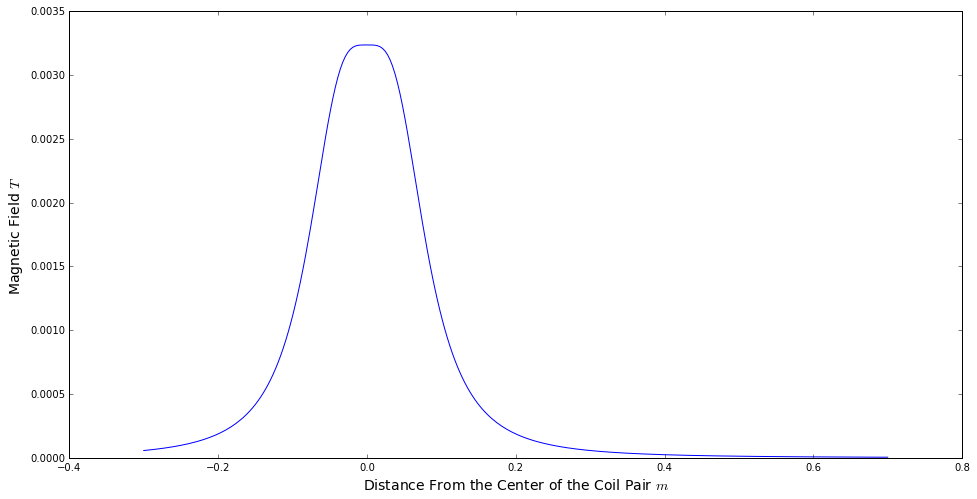

In [33]:
# here is the function we use to calculate B
def calc_B_theo(listOfYValues, R_x, N=1):
    # Takes a list of y offsets and returns a list of the field at each point
    
    m_0 = 4*np.pi*1.0e-7
    I = 1.50
    bField = []
    for i in range(len(listOfYValues)):
        R_y = listOfYValues[i]
        B = ((m_0*N*I*(R_x**2))/(2*((R_y**2 + R_x**2))**(3/2)))
        bField.append(B)
        
    return(bField)

# coil paramaters first we assume that each coil is represented by one loop of wire
y = np.linspace(-.3, .7, 300) # values at which to check the field
b1 = calc_B_theo(y-0.035, 0.07, N=168) # coil 1 field
b2 = calc_B_theo(y+0.035, 0.07, N=168) # coil 2 field
bTot = np.zeros(np.shape(y)) # total field 
for i in range(len(y)):
    bTot[i] = b1[i] + b2[i]
    
# plot the total field as a function of y

plt.xlabel('Distance From the Center of the Coil Pair $m$', fontsize='14')
plt.ylabel('Magnetic Field $T$', fontsize='14')
plt.plot(y, bTot)
plt.show()

Now that we have our model let's compare it with our observed data:

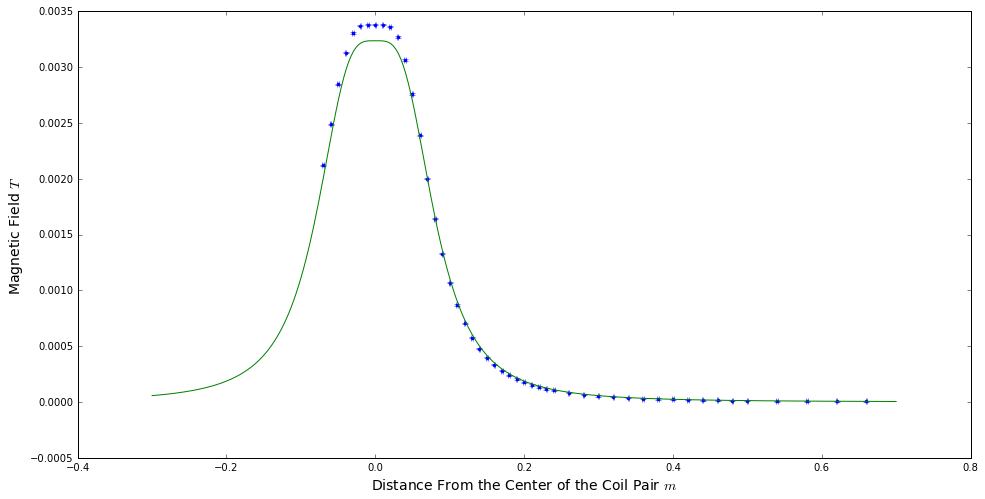

In [34]:
yAxisHelm = np.genfromtxt('helmFieldY.txt', delimiter=', ', skip_header=True) # unpack from text file

R_y = unumpy.uarray((yAxisHelm[:,0] - 14)*1e-2 , 0.001) # parse out the y values
#print(R_y)
helmVoltage = unumpy.uarray((yAxisHelm[:,1] - 0.05), 0.005) # add uncertinty in the voltage 0.015V was the far field offset.
helmField = helmVoltage * teslasPerVolt # convert voltage into field with our ratio

#print(helmField)
# Plot the data:
plt.xlabel('Distance From the Center of the Coil Pair $m$', fontsize='14')
plt.ylabel('Magnetic Field $T$', fontsize='14')
uFloat_errorbarr_plot(R_y, helmField)
plt.plot(y, bTot)
plt.show()

0.028875


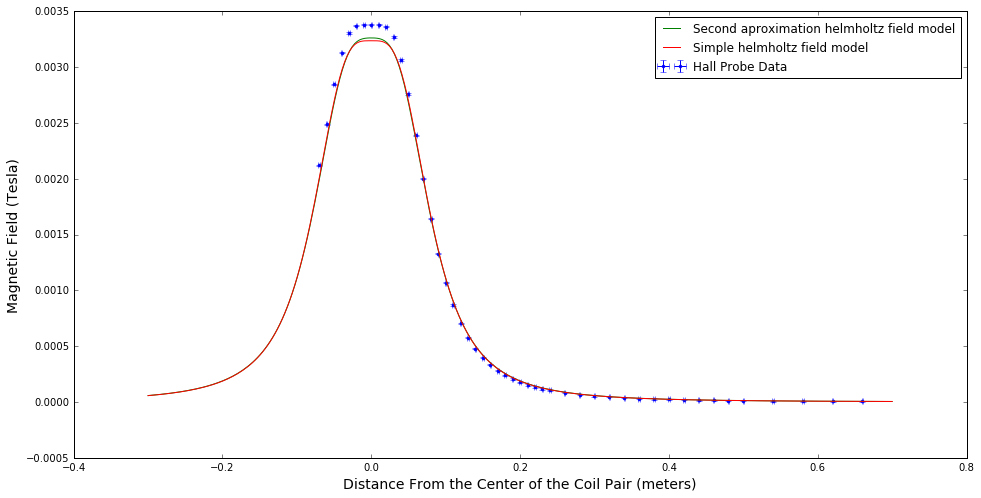

In [35]:
# now we want to refine our field model by considering the volume of the coil's field.
radiusSpread = np.linspace(.0673, .0737, 14)
RySpread = np.linspace(0, 0.01095, 12)

y = np.linspace(-.3, .7, 300)
b1 = [] # coil 1 field
b2 = [] # coil 2 field
bTot1 = np.zeros(np.shape(y))
RyMin = (0.05775/2)
print(RyMin)
for i in radiusSpread:
    for j in RySpread:
        b1 = calc_B_theo(y+(RyMin+j), i)
        b2 = calc_B_theo(y-(RyMin+j), i) #-1*RyMin - j)
        for k in range(len(y)):
            bTot1[k] += (b1[k] + b2[k])
            

plt.xlabel('Distance From the Center of the Coil Pair (meters)', fontsize='14')
plt.ylabel('Magnetic Field (Tesla)', fontsize='14')
uFloat_errorbarr_plot(R_y, helmField, label='Hall Probe Data')
plt.plot(y, bTot1, label='Second aproximation helmholtz field model')
plt.plot(y, bTot, label='Simple helmholtz field model')
plt.legend()
plt.savefig('helmholtzPlot.png', dpi=400, transperent = True)
plt.show()

ok so weve solved the mystery! the field for a solinoid that we were calulating was wrong it should be $\vec B = \frac{N}{L} \mu_0 I$ before we had neglected the length of the solinoid.

## 

Next we want to do the same for the quadrapole field. Also the field model would be simillar to the helm holtz configuraton. this time we only calculate the complicated field model.  

0.028875


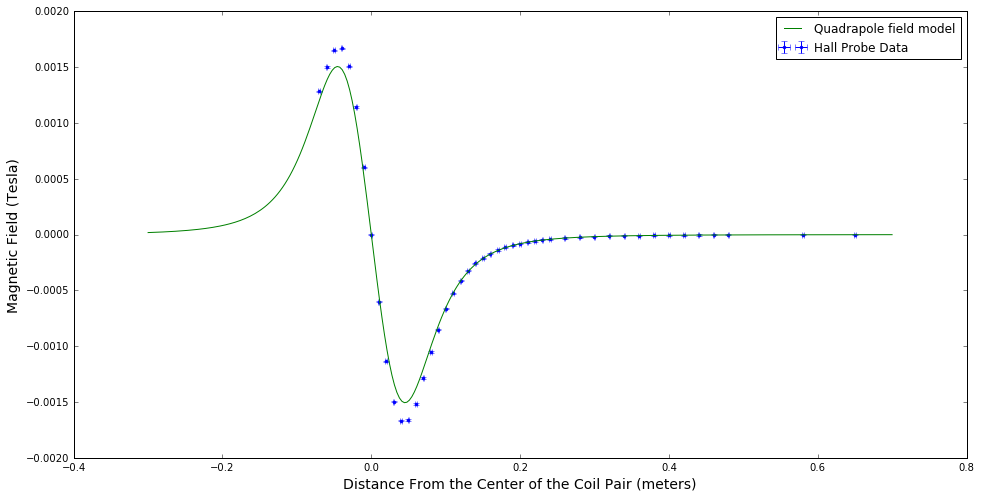

In [37]:
# import the quadrupole data: 
yAxisQuad = np.genfromtxt('QuadFieldY.txt', delimiter=', ', skip_header=True) # unpack from text file
#print(len(yAxisQuad[:,1]))
R_y = unumpy.uarray((yAxisQuad[:,0] - 15)*1e-2 , 0.001) # parse out the y values
#print(len(R_y))
quadVoltage = unumpy.uarray((yAxisQuad[:,1] - 0.05), 0.005) # add uncertinty in the voltage 0.015V was the far field offset.
#print(len(quadVoltage))
quadField = quadVoltage * teslasPerVolt # convert voltage into field with our ratio
#print(len(quadField))


radiusSpread = np.linspace(.0673, .0737, 14)
RySpread = np.linspace(0, 0.01095, 12)

y = np.linspace(-.3, .7, 300)
b1 = [] # coil 1 field
b2 = [] # coil 2 field
bTot1 = np.zeros(np.shape(y))
RyMin = (0.05775/2)
print(RyMin)
for i in radiusSpread:
    for j in RySpread:
        b1 = calc_B_theo(y+(RyMin+j), i)
        b2 = calc_B_theo(y-(RyMin+j), i) #-1*RyMin - j)
        for k in range(len(y)):
            bTot1[k] += (b1[k] - b2[k])
            
#plt.rcParams['figure.figsize'] = (8, 5)
plt.xlabel('Distance From the Center of the Coil Pair (meters)', fontsize='14')
plt.ylabel('Magnetic Field (Tesla)', fontsize='14')
uFloat_errorbarr_plot(R_y, quadField, label='Hall Probe Data')
#plt.plot(y, bTot, label='Simple helmholtz field model')
plt.plot(y, bTot1, label='Quadrapole field model')
plt.legend()
plt.savefig('quadPlot.png', dpi=400, transperent = True)
plt.show()